In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
iter_num = 50
generation = 300

In [20]:
def collect_n_species(out_name, iter_num, generation):

    n_species = []

    for i_iter in range(iter_num):
        iter_n_species = []
        for gen in range(generation):
            ind_n_species = []
            out_dir = './log/' + out_name + '/iter_{}/gen_{}.obj'.format(i_iter, str(gen).zfill(4))
            with open(out_dir, 'rb') as f:
                one_neat = pickle.load(f)
            for ind in one_neat:
                ind_n_species.append(ind.species)
            iter_n_species.append(len(set(ind_n_species)))
        n_species.append(iter_n_species)
        
    n_species = np.array(n_species)
    
    return n_species

In [49]:
n_species_normal = collect_n_species('history_normal', iter_num, generation)

yerr_normal = np.std(n_species_normal, axis=0)
y_normal_plus = n_species_normal.mean(axis = 0) + yerr_normal
y_normal_minus = n_species_normal.mean(axis = 0) - yerr_normal

In [50]:
n_species_hyb = collect_n_species('history_hyb', iter_num, generation)

yerr_hyb = np.std(n_species_hyb, axis=0)
y_hyb_plus = n_species_hyb.mean(axis = 0) + yerr_hyb
y_hyb_minus = n_species_hyb.mean(axis = 0) - yerr_hyb

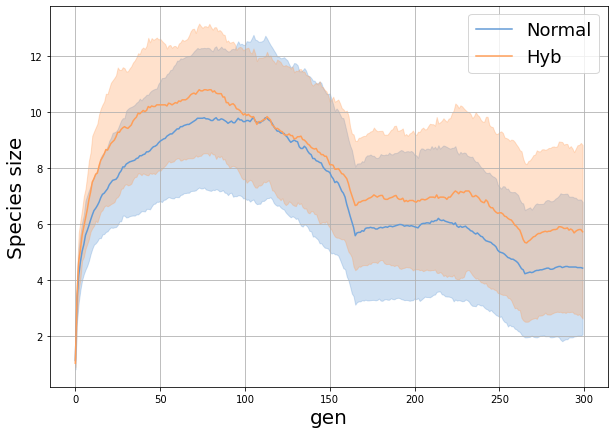

In [51]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(n_species_normal.mean(axis = 0), label = 'Normal', color = '#629ad6')
ax.fill_between(np.arange(0, 300, 1), y_normal_minus, y_normal_plus, alpha=0.3, color = '#629ad6')
ax.plot(n_species_hyb.mean(axis = 0), label = 'Hyb', color = '#ff9e58')
ax.fill_between(np.arange(0, 300, 1), y_hyb_minus, y_hyb_plus, alpha=0.3, color = '#ff9e58')
plt.legend(bbox_to_anchor=(0.75, 0.98), loc='upper left', borderaxespad=0, fontsize = 18)
plt.xlabel('generation', fontsize = 20)
plt.ylabel('Species Number', fontsize = 20)
plt.grid()
plt.show()

In [22]:
def collect_max_fitness(out_name, iter_num, generation):

    max_fitness = []

    for i_iter in range(iter_num):
        ind_max_fitness = []
        for gen in range(generation):
            out_dir = './log/' + out_name + '/iter_{}/gen_{}.obj'.format(i_iter, str(gen).zfill(4))
            with open(out_dir, 'rb') as f:
                one_neat = pickle.load(f)
            gen_fitness_list = []
            for ind in one_neat:
                gen_fitness_list.append(ind.fitness)
            ind_max_fitness.append(max(gen_fitness_list))
        max_fitness.append(ind_max_fitness)
    
    max_fitness = np.array(max_fitness)
    
    return max_fitness

In [52]:
max_fitness_normal = collect_max_fitness('history_normal', iter_num, generation)

yerr_normal = np.std(max_fitness_normal, axis=0)
y_normal_plus = max_fitness_normal.mean(axis = 0) + yerr_normal
y_normal_minus = max_fitness_normal.mean(axis = 0) - yerr_normal

In [53]:
max_fitness_hyb = collect_max_fitness('history_hyb', iter_num, generation)

yerr_hyb = np.std(max_fitness_hyb, axis=0)
y_hyb_plus = max_fitness_hyb.mean(axis = 0) + yerr_hyb
y_hyb_minus = max_fitness_hyb.mean(axis = 0) - yerr_hyb

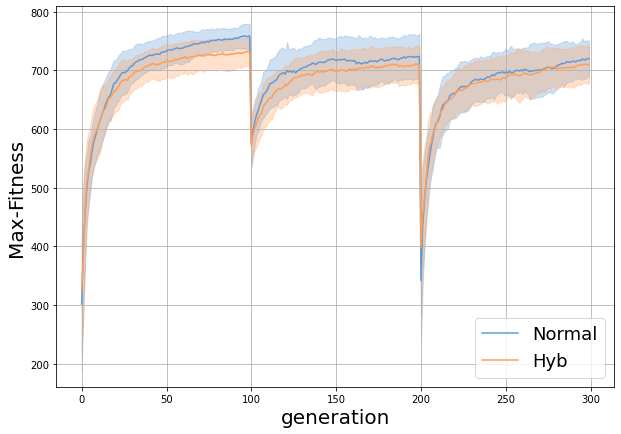

In [60]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(max_fitness_normal.mean(axis = 0), label = 'Normal', color = '#629ad6')
ax.fill_between(np.arange(0, 300, 1), y_normal_minus, y_normal_plus, alpha=0.3, color = '#629ad6')
ax.plot(max_fitness_hyb.mean(axis = 0), label = 'Hyb', color = '#ff9e58')
ax.fill_between(np.arange(0, 300, 1), y_hyb_minus, y_hyb_plus, alpha=0.3, color = '#ff9e58')
plt.legend(bbox_to_anchor=(0.75, 0.18), loc='upper left', borderaxespad=0, fontsize = 18)
plt.xlabel('generation', fontsize = 20)
plt.ylabel('Max-Fitness', fontsize = 20)
plt.grid()
plt.show()

In [43]:
def collect_reactivity(data, focus_gen, duration):

    over_mean = []
    recover_mean = []

    for i in range(data.shape[0]):
        pre_mean = data[i][focus_gen-duration:focus_gen-1].mean()
        post_iter = data[i][focus_gen:focus_gen+duration]
        over_p = False
        for j in range(len(post_iter)):
            if pre_mean < post_iter[j]:
                over_mean.append(1)
                recover_mean.append(j)
                over_p = True
                break
        if over_p == False:
            over_mean.append(0)
        
    over_mean = np.array(over_mean)
    recover_mean = np.array(recover_mean)
    
    return over_mean, recover_mean

In [55]:
over_mean_normal_100, recover_mean_normal_100 = collect_reactivity(max_fitness_normal, 100, 100)
over_mean_normal_200, recover_mean_normal_200 = collect_reactivity(max_fitness_normal, 200, 100)

max_fitness_normal_100 = max_fitness_normal[:, 100]
max_fitness_normal_200 = max_fitness_normal[:, 200]

In [56]:
over_mean_hyb_100, recover_mean_hyb_100 = collect_reactivity(max_fitness_hyb, 100, 100)
over_mean_hyb_200, recover_mean_hyb_200 = collect_reactivity(max_fitness_hyb, 200, 100)

max_fitness_hyb_100 = max_fitness_hyb[:, 100]
max_fitness_hyb_200 = max_fitness_hyb[:, 200]

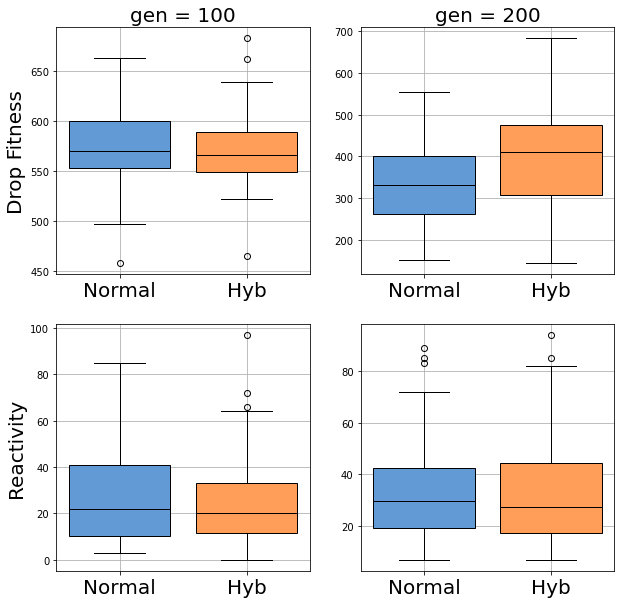

In [58]:
colors1=['#629ad6', '#ff9e58']
colors2=['black', 'black']

fig = plt.figure(figsize = (10, 10))

drop_fitness_data = (max_fitness_normal_100, max_fitness_hyb_100)

ax1 = fig.add_subplot(221)
bp = ax1.boxplot(drop_fitness_data, patch_artist=True, widths=0.8)

for b, c in zip(bp['boxes'], colors1):
    b.set(color='black', linewidth=1)
    b.set_facecolor(c)
    
for b, c in zip(bp['medians'], colors2):
    b.set(color=c, linewidth=1)
    
ax1.set_xticklabels(['Normal', 'Hyb'], fontsize = 20)
ax1.set_title('gen = 100', fontsize = 20)
ax1.set_ylabel('Drop Fitness', fontsize = 20)
plt.grid()

drop_fitness_data = (max_fitness_normal_200, max_fitness_hyb_200)

ax2 = fig.add_subplot(222)
bp = ax2.boxplot(drop_fitness_data, patch_artist=True, widths=0.8)


for b, c in zip(bp['boxes'], colors1):
    b.set(color='black', linewidth=1)
    b.set_facecolor(c)
    
for b, c in zip(bp['medians'], colors2):
    b.set(color=c, linewidth=1)
    
ax2.set_xticklabels(['Normal', 'Hyb'], fontsize = 20)
ax2.set_title('gen = 200', fontsize = 20)
plt.grid()

drop_fitness_data = (recover_mean_normal_100, recover_mean_hyb_100)

ax3 = fig.add_subplot(223)
bp = ax3.boxplot(drop_fitness_data, patch_artist=True, widths=0.8)


for b, c in zip(bp['boxes'], colors1):
    b.set(color='black', linewidth=1)
    b.set_facecolor(c)
    
for b, c in zip(bp['medians'], colors2):
    b.set(color=c, linewidth=1)
    
ax3.set_xticklabels(['Normal', 'Hyb'], fontsize = 20)
ax3.set_ylabel('Reactivity', fontsize = 20)
plt.grid()

drop_fitness_data = (recover_mean_normal_200, recover_mean_hyb_200)

ax4 = fig.add_subplot(224)
bp = ax4.boxplot(drop_fitness_data, patch_artist=True, widths=0.8)


for b, c in zip(bp['boxes'], colors1):
    b.set(color='black', linewidth=1)
    b.set_facecolor(c)
    
for b, c in zip(bp['medians'], colors2):
    b.set(color=c, linewidth=1)
    
ax4.set_xticklabels(['Normal', 'Hyb'], fontsize = 20)

plt.grid()
plt.show()